In [1]:
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# generate data
# normally distributed, μ=100, std_dev=15
data = norm.rvs(loc=100,scale=15,size=1000,random_state=1)

In [3]:
# function that takes in parameters and data, and spits out likelihoods
def likelihood(params,data):
    return norm.logpdf(data,loc=params[0],scale=params[1]).sum()

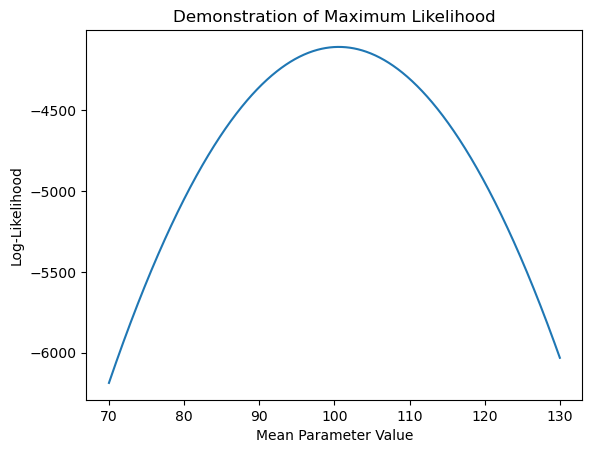

In [4]:
# hold the scale parameter constant and vary the location parameter
x = np.linspace(70,130,1000)
y = [likelihood([val,15],data) for val in x]

plt.plot(x,y)
plt.title('Demonstration of Maximum Likelihood')
plt.ylabel('Log-Likelihood')
plt.xlabel('Mean Parameter Value')
plt.show()

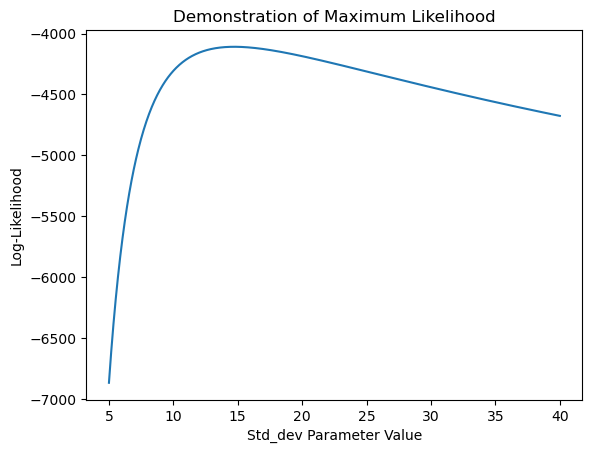

In [5]:
# hold the location parameter constant and vary the scale parameter
x = np.linspace(5,40,1000)
y = [likelihood([100,val],data) for val in x]

plt.plot(x,y)
plt.title('Demonstration of Maximum Likelihood')
plt.ylabel('Log-Likelihood')
plt.xlabel('Std_dev Parameter Value')
plt.show()

the log-likelihood for this data is maximized when we set the location parameter (mean) value to something close to 100. And similarly, it gets maximized when we set it to about 15.

In [6]:
# gradient descent methods
def neglikelihood(params,data):
    return -1*likelihood(params,data)

res = minimize(neglikelihood,[50,10],args=(data))
res

      fun: 4107.810128879504
 hess_inv: array([[ 0.21325833, -0.00224409],
       [-0.00224409,  0.10564036]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 363
      nit: 18
     njev: 121
   status: 0
  success: True
        x: array([100.58218203,  14.71505919])

In [7]:
res.x/np.diagonal(res.hess_inv)

array([471.64478807, 139.29391247])